In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Random Forrest

Random Forest is a popular ensemble learning algorithm used in supervised machine learning for classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the mode (for classification) or mean (for regression) of the individual trees' predictions.

Here's how Random Forest works:

Bootstrap Sampling (Random Sampling with Replacement): Random Forest starts by creating multiple bootstrap samples from the original dataset. Each bootstrap sample is generated by randomly selecting data points with replacement from the original dataset. This means that some data points may appear multiple times in a bootstrap sample while others may not appear at all.

Random Feature Selection: At each node of the decision tree, instead of considering all features to determine the best split, Random Forest considers only a random subset of features. This introduces randomness into the tree-building process and helps in decorrelating the trees.

Decision Tree Construction: For each bootstrap sample, a decision tree is constructed using the random subset of features. The decision trees are typically constructed using algorithms like CART (Classification and Regression Trees).

Voting (Classification) or Averaging (Regression): After constructing multiple decision trees, when making predictions for a new data point:

For classification tasks, each tree "votes" for the class, and the class with the most votes is chosen as the final prediction.
For regression tasks, each tree predicts a numerical value, and the average of these values is taken as the final prediction.
Advantages of Random Forest:

High Accuracy: Random Forest generally provides high accuracy in both classification and regression tasks.
Robustness: It is less sensitive to noisy data and overfitting compared to individual decision trees.
Feature Importance: It can provide insights into feature importance, which can be useful for feature selection.
Efficiency: It can handle large datasets with high dimensionality efficiently.
Disadvantages of Random Forest:

Complexity: Random Forest can be computationally expensive and memory-intensive, especially for large datasets with numerous trees and features.
Interpretability: The ensemble of decision trees can be challenging to interpret compared to a single decision tree.
Overfitting: While Random Forest reduces overfitting compared to individual decision trees, it can still overfit noisy data if not properly tuned.
Training Time: Training a Random Forest model can take longer compared to simpler algorithms, especially when dealing with a large number of trees and features.

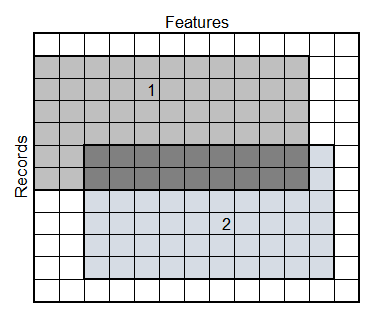

#### Random Forrest Code

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the random forest model
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_train, y_train)

# Make predictions
predictions = forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Cross-validation
cross_val_accuracy = np.mean(cross_val_score(forest_model, X, y, cv=5, scoring='accuracy'))
print(f"Cross-validated Accuracy: {cross_val_accuracy}")

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Cross-validated Accuracy: 0.9600000000000002


#### Random Forrest with Hyperparameter Tunning

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for pre-pruning in Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': range(1, 10),  # Maximum depth of the tree
    'min_samples_split': range(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(1, 5),  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Evaluate on the test set
rf_best = grid_search_rf.best_estimator_
predictions_rf = rf_best.predict(X_test)
print("Accuracy on test set (Random Forest):", accuracy_score(y_test, predictions_rf))

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9583333333333334
Accuracy on test set (Random Forest): 1.0
